<a href="https://colab.research.google.com/github/shivani12696/Aerofit_data_analysis_Python/blob/main/aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**Q1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset**

Downloading the data:

In [ ]:
!gdown 1DLkQw5SurlE0C-QgKQymkiL23eoDlFPf

Downloading...
From: https://drive.google.com/uc?id=1DLkQw5SurlE0C-QgKQymkiL23eoDlFPf
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 19.1MB/s]


How the data looks

In [ ]:
#Read Data
af = pd.read_csv('aerofit_treadmill.csv')
af

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


#Understanding the Dataset

In [ ]:
af.shape

(180, 9)

In [ ]:
af.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

Unique values in each column of the dataset:

In [ ]:
af.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [ ]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Columns Product, Gender and MaritalStatus have object datatype. It can be changed to categorical datatype.

In [ ]:
af = af.astype({'Product': 'category', 'Gender': 'category', 'MaritalStatus': 'category'})

In [ ]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [ ]:
af.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


The dataset has no null columns

In [ ]:
#Data Description
af.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
af['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


Quick summary:
1. Most common used treadmill is KP281, which is the entry level treadmill and
costs least among other treadmills ($1500).

2. Least common used treadmill is KP781. It has advance features and costs most ($2500).
3. 18 is the minimum age of the person who uses a treadmill and 50 is the maximum age.
4. 21 miles is the minimum miles a person is expected to run per week.
5. 360 miles is the maximum miles a person is expected to run per week.


**Q3. Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)**

**AGE**

In [ ]:
af['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
age_bin = range(15, 51, 5)
af['age_group'] = pd.cut(af['Age'], age_bin)
af.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,"(15, 20]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(15, 20]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(15, 20]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(15, 20]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(15, 20]"


In [ ]:
pd.crosstab(af['Product'], af['age_group'], margins = True)

age_group,"(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]",All
Product,,,,,,,,
KP281,6,28,21,11,8,3,3,80
KP481,4,24,7,17,6,1,1,60
KP781,0,17,13,4,2,2,2,40
All,10,69,41,32,16,6,6,180


In [ ]:
69/180

0.38333333333333336

38% treadmill users fall in the category (20, 25], which is the highest age group.

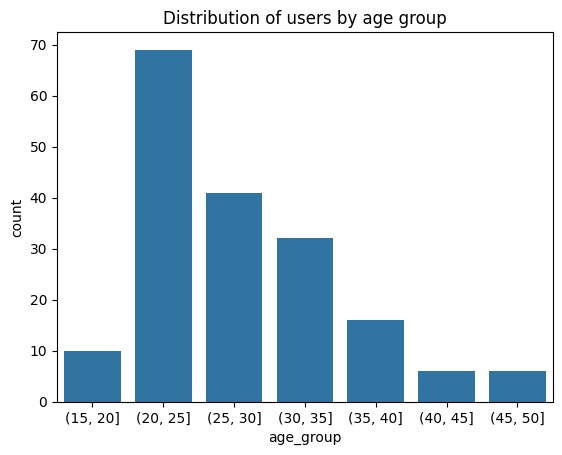

In [ ]:
sns.countplot(data = af, x = 'age_group')
plt.title('Distribution of users by age group')
plt.show()

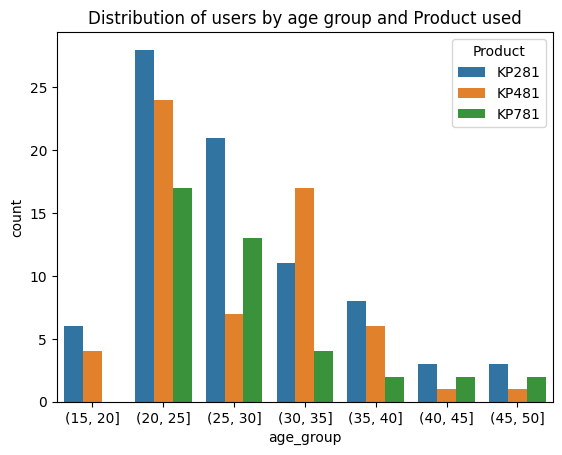

In [ ]:
sns.countplot(data = af, x = 'age_group', hue = 'Product')
plt.title('Distribution of users by age group and Product used')
plt.show()

**MARITAL STATUS**

In [ ]:
af_marital = af['MaritalStatus'].value_counts()
af_marital

,count
MaritalStatus,
Partnered,107
Single,73


In [ ]:
pd.crosstab(af['Product'], af['MaritalStatus'], margins = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [ ]:
int(107*100/180), int(73*100/180)

(59, 40)

In [ ]:
48/107, 36/107, 23/107

(0.4485981308411215, 0.3364485981308411, 0.21495327102803738)

In [ ]:
32/73, 24/73, 17/73

(0.4383561643835616, 0.3287671232876712, 0.2328767123287671)

In [ ]:
23/40, 17/40

(0.575, 0.425)

1. ~60% people are partnered and 40% are single.
2. Among partnered, 44% are KP281 users, 33% are KP481 users, and 21% are KP781 users.
3. Among single, 43% are KP281 users, 32% are KP481 users, and 23% are KP781 users.

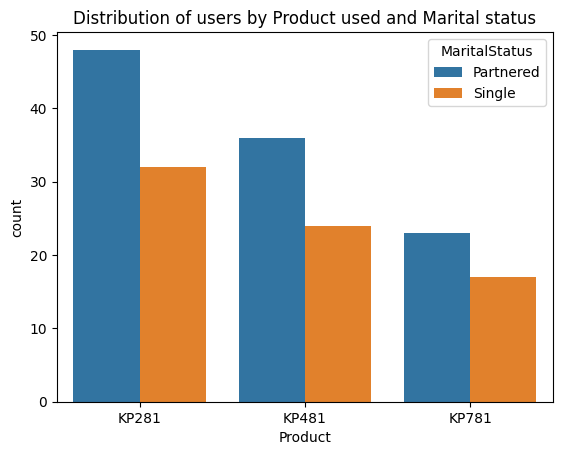

In [ ]:
sns.countplot(data = af, x = 'Product', hue = 'MaritalStatus')
plt.title('Distribution of users by Product used and Marital status')
plt.show()

1. both in KP281 and KP481, 60% users are partnered and 40% are single.
2. Among KP781 users, 57% are partnered and 43% are single.

**GENDER**

In [ ]:
pd.crosstab(af['Product'], af['Gender'], margins = True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [ ]:
29*100/60, 31*100/60, 7*100/40, 33*100/40

(48.333333333333336, 51.666666666666664, 17.5, 82.5)

While KP281 users are 50% male and 50% female, and KP481 users are 48% female and 52% male, the ratio drastically changes for KP781 users (17.5% female and 82.5% male)

Question: What is the probability of a male customer buying a KP781 treadmill?
Answer:
1. Conditional probability of a **male** customer buying a **KP781** treadmill is, P(T/M) = 33/104 = 33%.
2. Conditional probability of a **male** customer buying a **KP281** treadmill is, P(T/M) = 40/104 = 38%.
3. Conditional probability of a **male** customer buying a **KP481** treadmill is, P(T/M) = 31/104 = 30%.
4. Conditional probability of a **female** customer buying a **KP781** treadmill is, P(T/M) = 7/76 = 9%.
5. Conditional probability of a **female** customer buying a **KP281** treadmill is, P(T/M) = 40/76 = 52%.
6. Conditional probability of a **female** customer buying a **KP481** treadmill is, P(T/M) = 29/76 = 38%.

**EDUCATION**

In [ ]:
af['Education'].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


In [ ]:
education_val = af['Education'].value_counts().index
education_val

Index([16, 14, 18, 15, 13, 12, 21, 20], dtype='int64', name='Education')

In [ ]:
education_count = af['Education'].value_counts().values
education_count

array([85, 55, 23,  5,  5,  3,  3,  1])

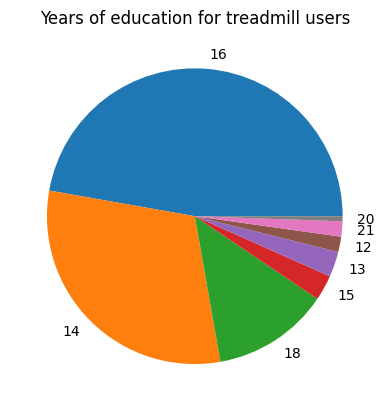

In [ ]:
fig, ax = plt.subplots()
ax.pie(education_count, labels= education_val)
plt.title('Years of education for treadmill users')
plt.show()

In [ ]:
pd.crosstab(af['Product'], af['Education'], margins = True)

Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,2,3,30,4,39,2,0,0,80
KP481,1,2,23,1,31,2,0,0,60
KP781,0,0,2,0,15,19,1,3,40
All,3,5,55,5,85,23,1,3,180


1. among KP781 users, 47.5% (19/40) have **18 years** of education, and 37% (15/40) have **16 years** of education.
2. among KP481 users, 51% (31/60) have **16 years** of education, and 38% (23/60) have **14 years** of education.
3. among KP281 users, 48% (39/80) have **16 years** of education, and 37.5% (30/80) have **14 years** of education.
4. among people with higher years of education (18, 20 and 21 years), users have only purchased KP781 product.

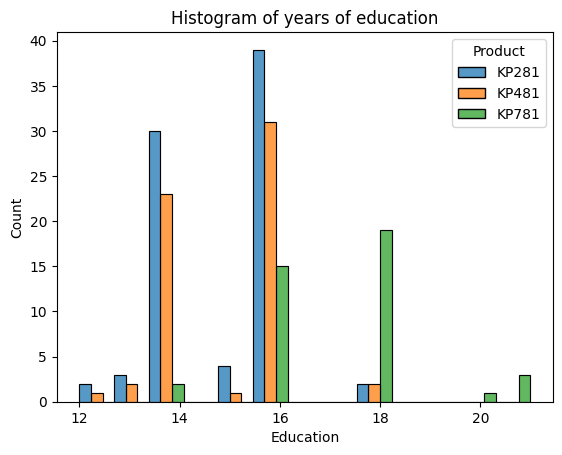

In [ ]:
sns.histplot(data = af, x = 'Education', hue = 'Product', multiple = 'dodge')
plt.title('Histogram of years of education')
plt.show()

**USAGE**

In [ ]:
pd.crosstab(af['Product'], af['Usage'], margins = True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
All,33,69,52,17,7,2,180


1. among KP281 users, 46% (37/80) use 3 times a week, and 27.5% (22/80) use 4 times a week.
2. among KP481 users, 51% (31/60) use 3 times a week, and 23% (14/60) use 2 times a week.
3. among KP781 users, 45% (18/40) use 4 times a week, and 30% (12/40) use 5 times a week.
4. users of KP781 treadmill are more consistent, and use it atleast 4 times a week. they can also go up to 7 times a week. which means they are more fitness obsessed.
5. users of other treadmills use them on an average 4 times a week and are less consistent.

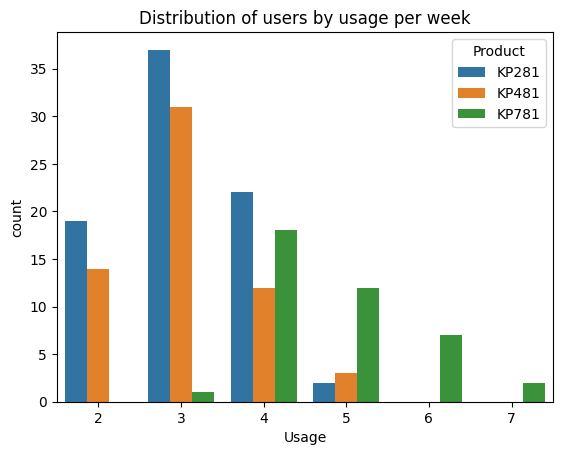

In [ ]:
sns.countplot(data = af, x = 'Usage', hue = 'Product', dodge = True)
plt.title('Distribution of users by usage per week')
plt.show()

**FITNESS**

In [ ]:
pd.crosstab(af['Product'], af['Fitness'], margins= True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


1. More fitness rating of 4 or 5 are given by KP781 users.
2. Though more people are using KP281 model, advanced model users are more satisfied with their self-given ratings.

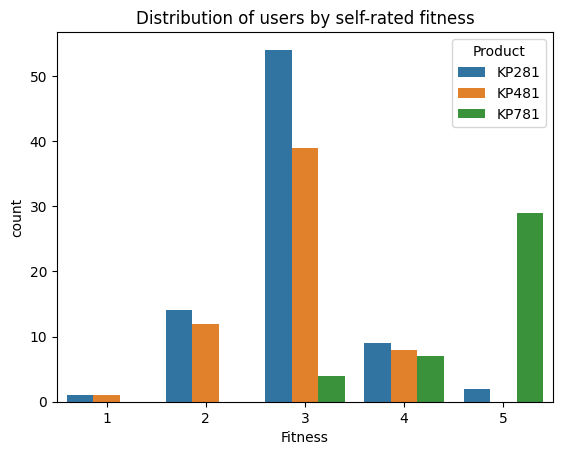

In [ ]:
sns.countplot(data = af, x = 'Fitness', hue = 'Product')
plt.title('Distribution of users by self-rated fitness')
plt.show()

**INCOME**

In [ ]:
af[af['Product'] == 'KP281'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [ ]:
af[af['Product'] == 'KP481'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [ ]:
af[af['Product'] == 'KP781'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


In [ ]:
af['Income'].value_counts().index

Index([ 45480,  52302,  53439,  54576,  46617,  51165,  50028,  40932,  48891,
        43206,  38658,  34110,  35247,  32973,  57987,  36384,  44343,  60261,
        59124,  90886,  92131,  64809,  56850,  61398,  39795,  67083,  47754,
        31836,  37521,  42069,  88396,  83416, 104581,  89641,  49801,  64741,
        48556,  61006,  55713,  68220,  30699,  29562,  58516,  54781,  62535,
        65220,  70966,  62251,  57271,  52291,  53536,  48658,  69721,  74701,
        77191,  75946,  52290,  85906,  99601, 103336,  95866,  95508],
      dtype='int64', name='Income')

In [ ]:
income_bin = range(29000, 110000, 10000)
af['income_group'] = pd.cut(af['Income'], income_bin)
af.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,income_group
0,KP281,18,Male,14,Single,3,4,29562,112,"(15, 20]","(29000, 39000]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(15, 20]","(29000, 39000]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(15, 20]","(29000, 39000]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(15, 20]","(29000, 39000]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(15, 20]","(29000, 39000]"


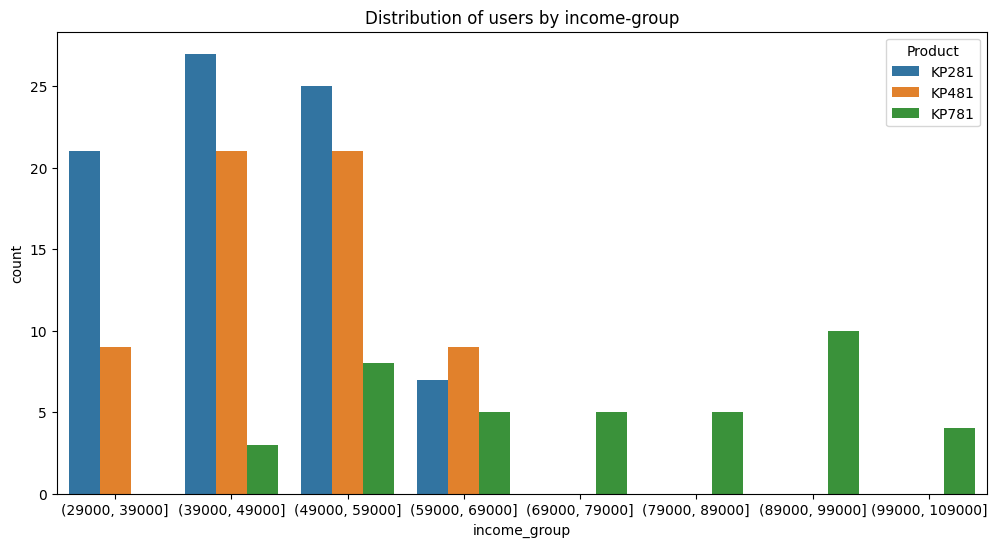

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data = af, x = 'income_group', hue = 'Product')
plt.title('Distribution of users by income-group')
plt.show()


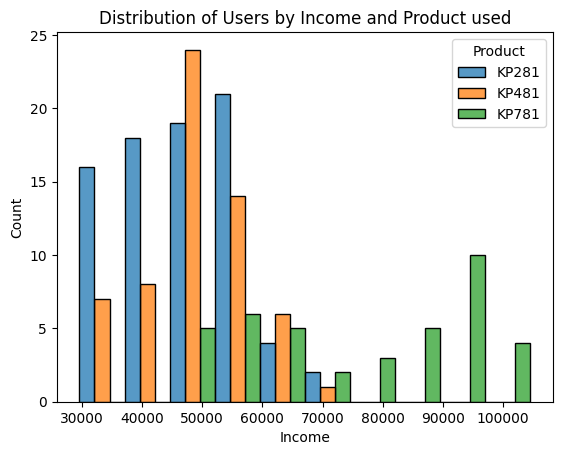

In [ ]:
sns.histplot(data = af, x = 'Income', bins = 10, hue = 'Product', multiple= 'dodge')
plt.title('Distribution of Users by Income and Product used')
plt.show()

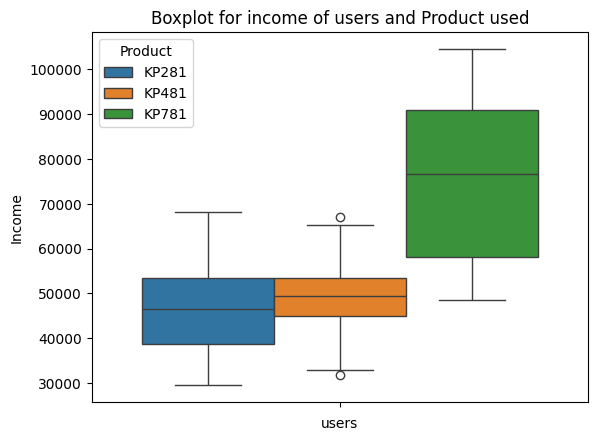

In [ ]:
sns.boxplot(data = af, y = 'Income', hue = 'Product')
plt.title('Boxplot for income of users and Product used')
plt.xlabel('users')
plt.show()

**Miles**

In [ ]:
af.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,income_group
0,KP281,18,Male,14,Single,3,4,29562,112,"(15, 20]","(29000, 39000]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(15, 20]","(29000, 39000]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(15, 20]","(29000, 39000]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(15, 20]","(29000, 39000]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(15, 20]","(29000, 39000]"


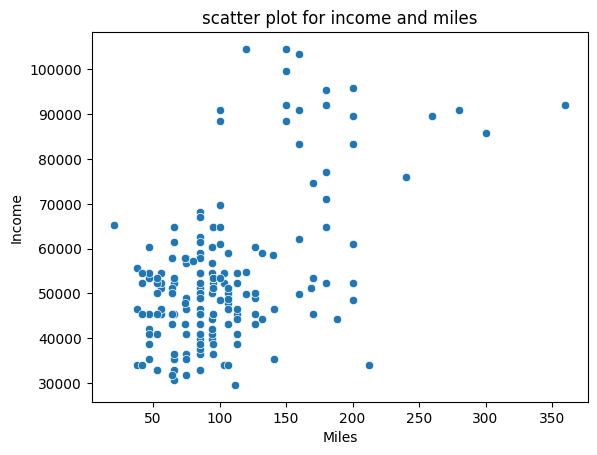

In [ ]:
sns.scatterplot(data = af, x = 'Miles', y = 'Income')
plt.title('scatter plot for income and miles')
plt.show()

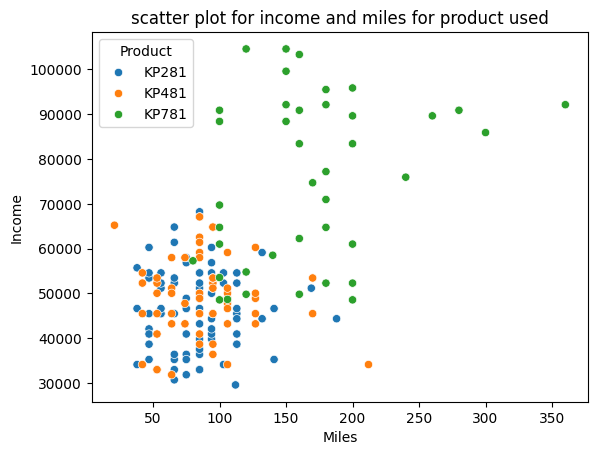

In [ ]:
sns.scatterplot(data = af, x = 'Miles', y = 'Income', hue = 'Product')
plt.title('scatter plot for income and miles for product used')
plt.show()

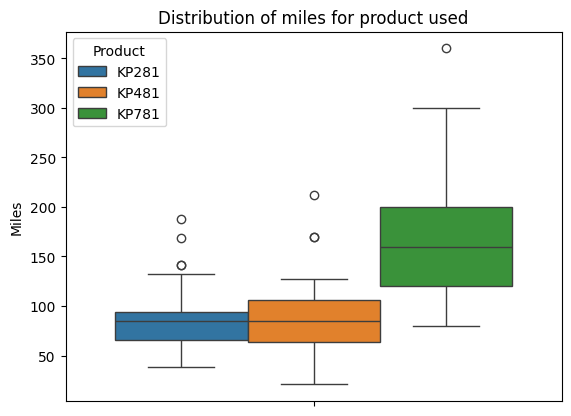

In [ ]:
sns.boxplot(data = af, y = 'Miles', hue = 'Product')
plt.title('Distribution of miles for product used')
plt.show()

1. KP781 has the highest mileage performance but also shows the most variability, including some very high outliers.

2. KP481 performs slightly better than KP281 but still has a similar range.

3. KP281 has the lowest mileage and the least variability, making it more consistent but lower in performance.

Question: Check correlation among different factors using heat maps or pair plots.

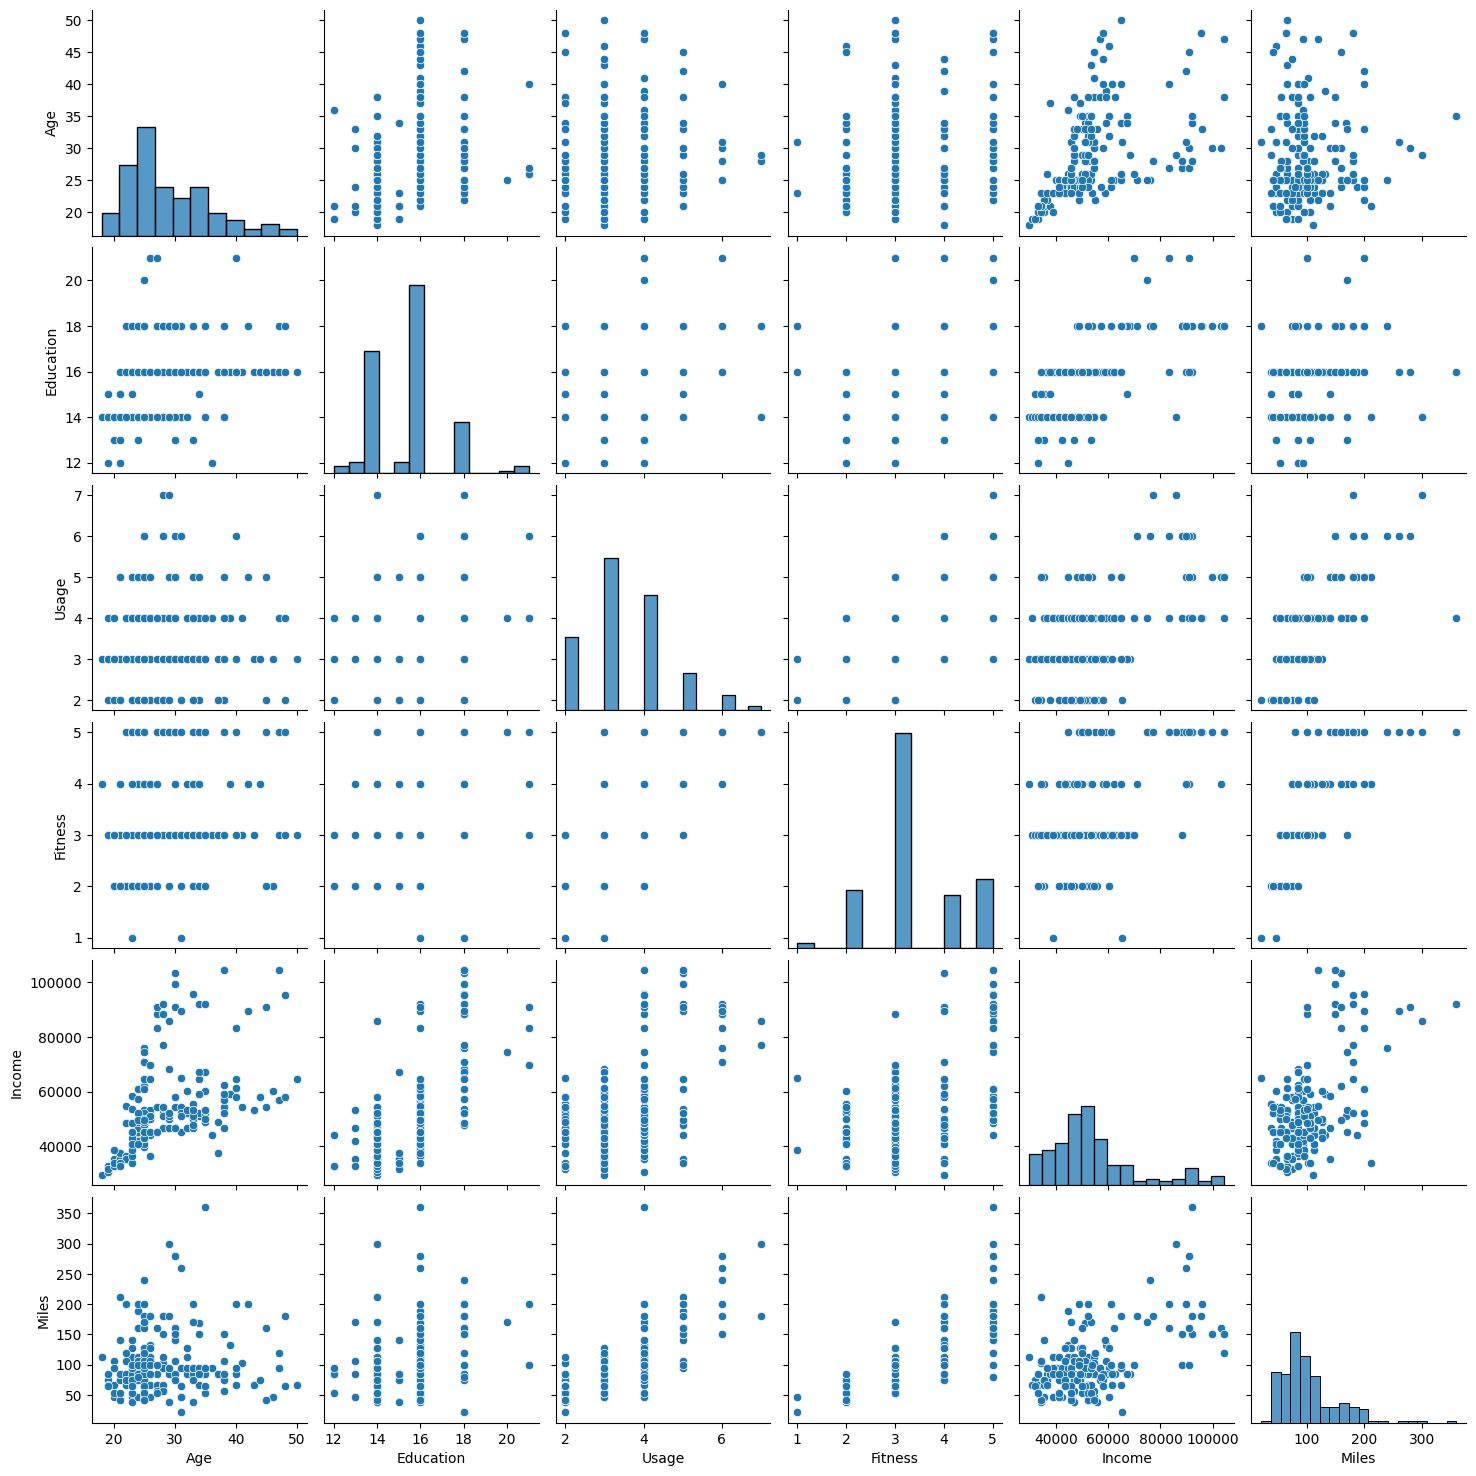

In [ ]:
sns.pairplot(data = af)
plt.show()

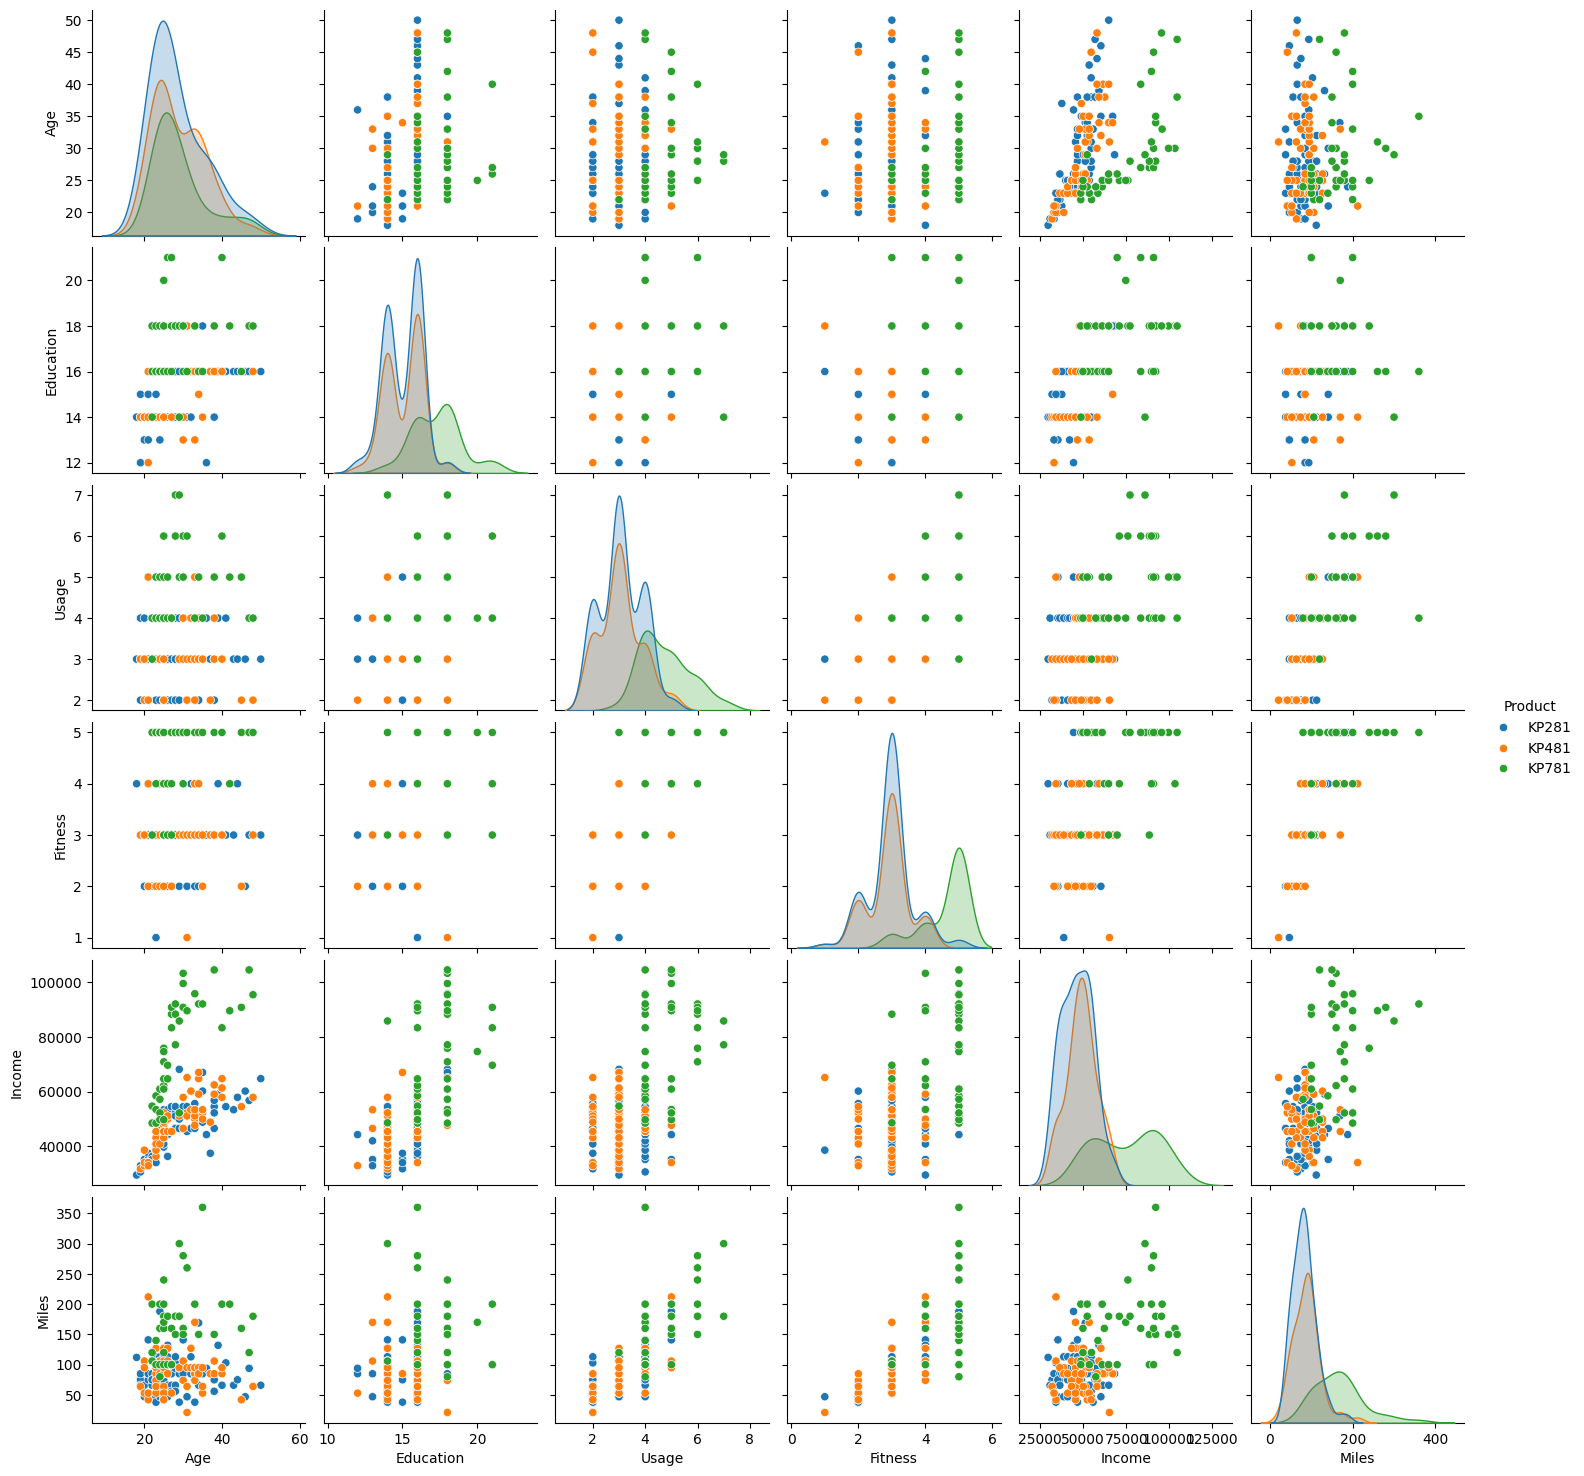

In [ ]:
sns.pairplot(data = af, hue = 'Product')
plt.show()

**Insights:**
1. income and miles convered shows positive correlation. Meaning, as income increases, miles covered also increases. KP781 users have higher income than other users.
2. Income and age are also correlated.

**Heatmap**

In [ ]:
cor = af.select_dtypes(include= ['number']).corr()
cor

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


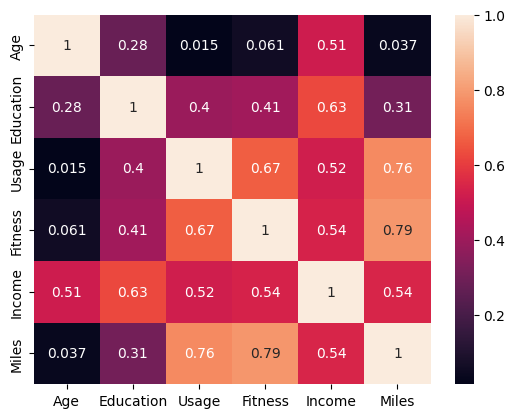

In [ ]:
sns.heatmap(cor, annot = True)
plt.show()

**summary: **
1. education and income are correlated.
2. usage and fitness are correlated. The more a person uses treadmill per week, the more fit he/ she gets.
3. usage and miles are correlated.
4. Miles and fitness are correlated. More miles covered, more fit a person gets.
